<a href="https://colab.research.google.com/github/nirkor123/AI_course/blob/main/H_W_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

hello, act like you are a professional python coder and you use google collab and keras, is it clear?

can you please build with DL a machine to convert temp from celsius to fahrenheit, where the formula is a linear equation.
I need you to build me a vector of Celsius and a vector of Fahrenheit. which will contain 10 dimensions (temperature).
Using a hook, build me one layer that contains one neuron that receives the Celsius vector at the input and its response the Fahrenheit vector.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Create a vector of Celsius temperatures
celsius_temps = np.array([-40, -20, 0, 10, 15, 25, 30, 40, 50, 60], dtype=float)

# Convert Celsius to Fahrenheit using the linear equation (F = C * 1.8 + 32)
fahrenheit_temps = (celsius_temps * 1.8) + 32

# Build the model
model = models.Sequential()

# Add a single neuron layer with input_dim=1 (as we have one feature - Celsius temperature)
model.add(layers.Dense(units=1, input_dim=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define a hook to print the output during training
class PrintOutput(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:
            print("\nEpoch {}: Predictions - {}".format(epoch, self.model.predict(celsius_temps)))

# Train the model
model.fit(celsius_temps, fahrenheit_temps, epochs=500, callbacks=[PrintOutput()])

# Evaluate the model
loss = model.evaluate(celsius_temps, fahrenheit_temps)
print("\nFinal loss: {:.2f}".format(loss))

# Use the model to predict Fahrenheit temperatures for new Celsius values
new_celsius_temps = np.array([100, 0, -10], dtype=float)
predictions = model.predict(new_celsius_temps)
print("\nPredictions for new Celsius temperatures:")
for c, f in zip(new_celsius_temps, predictions):
    print("{:.2f} Celsius -> {:.2f} Fahrenheit".format(c, f[0]))


Epoch 1/500
1/1 [==============================] - 0s 53ms/step

Epoch 0: Predictions - [[-5.75651169e+01]
 [-2.87820587e+01]
 [ 1.00002321e-03]
 [ 1.43925295e+01]
 [ 2.15882931e+01]
 [ 3.59798241e+01]
 [ 4.31755867e+01]
 [ 5.75671158e+01]
 [ 7.19586487e+01]
 [ 8.63501740e+01]]
1/1 [==============================] - 1s 665ms/step - loss: 1568.9175
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 1566.9186
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 1564.9221
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 1562.9281
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 1560.9365
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 1558.9476
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 1556.9614
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 1554.9778
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 1552.9968

Can you please prepare it for training, for that you need to compile, we want the code to check the error, using the average of the squared errors, with a learning step of 0.01.
In the human optimization algorithm.
Then train the network.
You will do the training for me with 500 epochs,
After you have trained the network, make a prediction for me what the response to the number 100 will be and show me the weights of your network.
and print the graph of convergence process of learning

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 16884.7324

1/1 [==============================] - 0s 64ms/step

Epoch 0: Predictions - [[ 5.81907730e+01]
 [ 2.91003857e+01]
 [ 1.00002307e-02]
 [-1.45351925e+01]
 [-2.18077888e+01]
 [-3.63529816e+01]
 [-4.36255760e+01]
 [-5.81707687e+01]
 [-7.27159653e+01]
 [-8.72611542e+01]]
1/1 [==============================] - 1s 1s/step - loss: 16884.7324
Epoch 2/500
1/1 [==============================] - 0s 20ms/step - loss: 16796.8086
Epoch 3/500
1/1 [==============================] - 0s 17ms/step - loss: 16709.1328
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 16621.7070
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 16534.5273
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 16447.6074
Epoch 7/500
1/1 [==============================] - 0s 21ms/step - loss: 16360.9482
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 16274.5527
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 16188.4277
E

1/1 [==============================] - 0s 149ms/step - loss: 859.8895



Final loss: 859.89
1/1 [==============================] - 0s 99ms/step

Prediction for 100 Celsius: 177.39 Fahrenheit

Weights:
Weights: [[1.7355399]]
Biases: [3.83337]


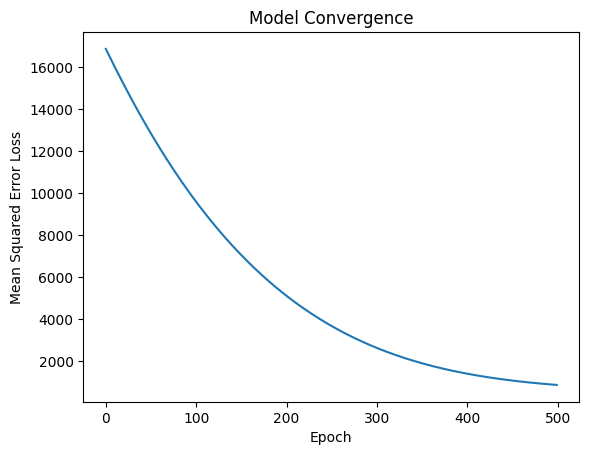

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Create a vector of Celsius temperatures
celsius_temps = np.array([-40, -20, 0, 10, 15, 25, 30, 40, 50, 60], dtype=float)

# Convert Celsius to Fahrenheit using the linear equation (F = C * 1.8 + 32)
fahrenheit_temps = celsius_temps * 1.8 + 32

# Build the model
model = models.Sequential()

# Add a single neuron layer with input_dim=1 (as we have one feature - Celsius temperature)
model.add(layers.Dense(units=1, input_dim=1, activation='linear'))

# Compile the model with mean squared error and a learning rate of 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error')

# Define a hook to print the output during training
class PrintOutput(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:
            print("\nEpoch {}: Predictions - {}".format(epoch, self.model.predict(celsius_temps)))

# Train the model
history = model.fit(celsius_temps, fahrenheit_temps, epochs=500, callbacks=[PrintOutput()])

# Evaluate the model
loss = model.evaluate(celsius_temps, fahrenheit_temps)
print("\nFinal loss: {:.2f}".format(loss))

# Make a prediction for the number 100
prediction_100 = model.predict([100])
print("\nPrediction for 100 Celsius: {:.2f} Fahrenheit".format(prediction_100[0, 0]))

# Print the weights of the network
print("\nWeights:")
for layer in model.layers:
    weights, biases = layer.get_weights()
    print("Weights: {}".format(weights))
    print("Biases: {}".format(biases))

# Plot the convergence process
plt.plot(history.history['loss'])
plt.title('Model Convergence')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.show()


 אני עכשיו מגדיל את הקצב למידה ל0.03

Epoch 1/500
1/1 [==============================] - 0s 55ms/step

Epoch 0: Predictions - [[ 4.6487236e+01]
 [ 2.3258617e+01]
 [ 3.0000694e-02]
 [-1.1584308e+01]
 [-1.7391462e+01]
 [-2.9005770e+01]
 [-3.4812923e+01]
 [-4.6427231e+01]
 [-5.8041538e+01]
 [-6.9655853e+01]]
1/1 [==============================] - 1s 684ms/step - loss: 14614.3828
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 14370.5312
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 14128.8848
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 13889.4736
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 13652.3340
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 13417.5029
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 13185.0127
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 12954.8955
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 12727.1807

1/1 [==============================] - 0s 81ms/step - loss: 394.8328

Final loss: 394.83
1/1 [==============================] - 0s 51ms/step

Prediction for 100 Celsius: 223.59 Fahrenheit

Weights:
Weights: [[2.1453497]]
Biases: [9.0542755]


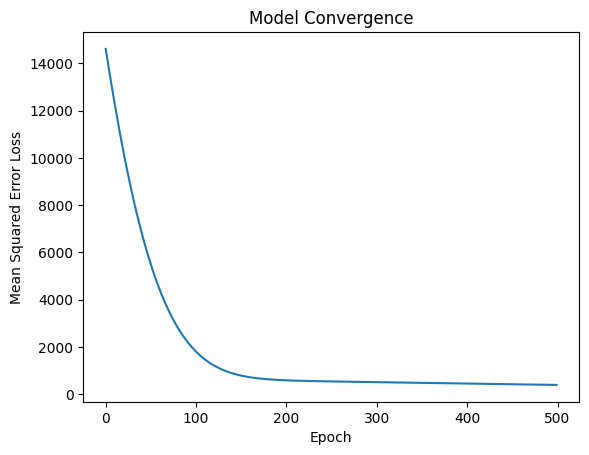

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Create a vector of Celsius temperatures
celsius_temps = np.array([-40, -20, 0, 10, 15, 25, 30, 40, 50, 60], dtype=float)

# Convert Celsius to Fahrenheit using the linear equation (F = C * 1.8 + 32)
fahrenheit_temps = celsius_temps * 1.8 + 32

# Build the model
model = models.Sequential()

# Add a single neuron layer with input_dim=1 (as we have one feature - Celsius temperature)
model.add(layers.Dense(units=1, input_dim=1, activation='linear'))

# Compile the model with mean squared error and a learning rate of 0.03
opt = tf.keras.optimizers.Adam(learning_rate=0.03)
model.compile(optimizer=opt, loss='mean_squared_error')

# Define a hook to print the output during training
class PrintOutput(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:
            print("\nEpoch {}: Predictions - {}".format(epoch, self.model.predict(celsius_temps)))

# Train the model
history = model.fit(celsius_temps, fahrenheit_temps, epochs=500, callbacks=[PrintOutput()])

# Evaluate the model
loss = model.evaluate(celsius_temps, fahrenheit_temps)
print("\nFinal loss: {:.2f}".format(loss))

# Make a prediction for the number 100
prediction_100 = model.predict([100])
print("\nPrediction for 100 Celsius: {:.2f} Fahrenheit".format(prediction_100[0, 0]))

# Print the weights of the network
print("\nWeights:")
for layer in model.layers:
    weights, biases = layer.get_weights()
    print("Weights: {}".format(weights))
    print("Biases: {}".format(biases))

# Plot the convergence process
plt.plot(history.history['loss'])
plt.title('Model Convergence')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.show()


 עכשיו אני אקטין את קצב הלמידה ל0.02 אבל אגדיל את כמות האפוקים ל1000

Epoch 1/1000
1/1 [==============================] - 0s 37ms/step

Epoch 0: Predictions - [[-4.25048676e+01]
 [-2.12424335e+01]
 [ 2.00004596e-02]
 [ 1.06512175e+01]
 [ 1.59668255e+01]
 [ 2.65980415e+01]
 [ 3.19136505e+01]
 [ 4.25448685e+01]
 [ 5.31760826e+01]
 [ 6.38073006e+01]]
1/1 [==============================] - 1s 1s/step - loss: 2509.1440
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 2451.0962
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 2394.0276
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 2337.9536
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 2282.8899
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 2228.8503
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 2175.8491
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 2123.8979
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 20

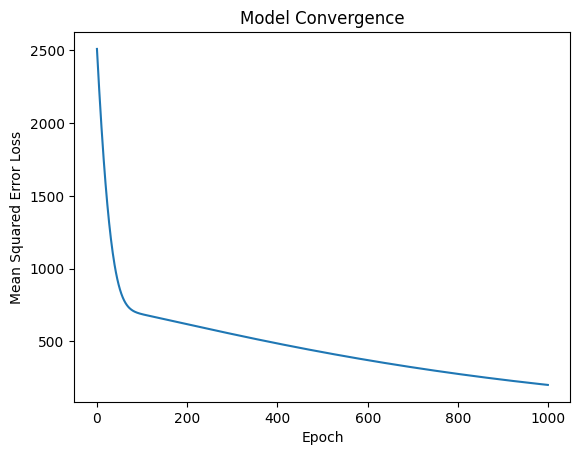

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Create a vector of Celsius temperatures
celsius_temps = np.array([-40, -20, 0, 10, 15, 25, 30, 40, 50, 60], dtype=float)

# Convert Celsius to Fahrenheit using the linear equation (F = C * 1.8 + 32)
fahrenheit_temps = celsius_temps * 1.8 + 32

# Build the model
model = models.Sequential()

# Add a single neuron layer with input_dim=1 (as we have one feature - Celsius temperature)
model.add(layers.Dense(units=1, input_dim=1, activation='linear'))

# Compile the model with mean squared error and a learning rate of 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
model.compile(optimizer=opt, loss='mean_squared_error')

# Define a hook to print the output during training
class PrintOutput(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:
            print("\nEpoch {}: Predictions - {}".format(epoch, self.model.predict(celsius_temps)))

# Train the model
history = model.fit(celsius_temps, fahrenheit_temps, epochs=1000, callbacks=[PrintOutput()])

# Evaluate the model
loss = model.evaluate(celsius_temps, fahrenheit_temps)
print("\nFinal loss: {:.2f}".format(loss))

# Make a prediction for the number 100
prediction_100 = model.predict([100])
print("\nPrediction for 100 Celsius: {:.2f} Fahrenheit".format(prediction_100[0, 0]))

# Print the weights of the network
print("\nWeights:")
for layer in model.layers:
    weights, biases = layer.get_weights()
    print("Weights: {}".format(weights))
    print("Biases: {}".format(biases))

# Plot the convergence process
plt.plot(history.history['loss'])
plt.title('Model Convergence')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.show()


עכשיו אגדיל את קצב הלמידה ל0.05 ואחזיר את כמת האפוקים ל500

Epoch 1/500
1/1 [==============================] - 0s 61ms/step

Epoch 0: Predictions - [[-6.95188293e+01]
 [-3.47344131e+01]
 [ 5.00011556e-02]
 [ 1.74422092e+01]
 [ 2.61383114e+01]
 [ 4.35305214e+01]
 [ 5.22266235e+01]
 [ 6.96188354e+01]
 [ 8.70110397e+01]
 [ 1.04403244e+02]]
1/1 [==============================] - 1s 693ms/step - loss: 1158.7035
Epoch 2/500
1/1 [==============================] - 0s 14ms/step - loss: 1091.0935
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 1029.6272
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 974.3832
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 925.3983
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 882.6540
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 846.0671
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 815.4787
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 790.6437
Epo

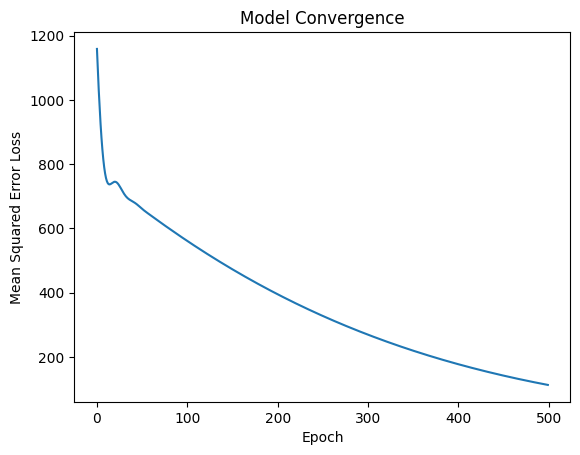

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Create a vector of Celsius temperatures
celsius_temps = np.array([-40, -20, 0, 10, 15, 25, 30, 40, 50, 60], dtype=float)

# Convert Celsius to Fahrenheit using the linear equation (F = C * 1.8 + 32)
fahrenheit_temps = celsius_temps * 1.8 + 32

# Build the model
model = models.Sequential()

# Add a single neuron layer with input_dim=1 (as we have one feature - Celsius temperature)
model.add(layers.Dense(units=1, input_dim=1, activation='linear'))

# Compile the model with mean squared error and a learning rate of 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=opt, loss='mean_squared_error')

# Define a hook to print the output during training
class PrintOutput(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:
            print("\nEpoch {}: Predictions - {}".format(epoch, self.model.predict(celsius_temps)))

# Train the model
history = model.fit(celsius_temps, fahrenheit_temps, epochs=500, callbacks=[PrintOutput()])

# Evaluate the model
loss = model.evaluate(celsius_temps, fahrenheit_temps)
print("\nFinal loss: {:.2f}".format(loss))

# Make a prediction for the number 100
prediction_100 = model.predict([100])
print("\nPrediction for 100 Celsius: {:.2f} Fahrenheit".format(prediction_100[0, 0]))

# Print the weights of the network
print("\nWeights:")
for layer in model.layers:
    weights, biases = layer.get_weights()
    print("Weights: {}".format(weights))
    print("Biases: {}".format(biases))

# Plot the convergence process
plt.plot(history.history['loss'])
plt.title('Model Convergence')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.show()


can you please Increase the network with more perceptrons

Epoch 1/500
1/1 [==============================] - 0s 50ms/step

Epoch 0: Predictions - [[-9.2466805e+01]
 [-4.6216942e+01]
 [ 3.2920823e-02]
 [ 2.3157854e+01]
 [ 3.4720322e+01]
 [ 5.7845253e+01]
 [ 6.9407722e+01]
 [ 9.2532661e+01]
 [ 1.1565759e+02]
 [ 1.3878252e+02]]
1/1 [==============================] - 1s 734ms/step - loss: 778.2762
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 768.2350
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 764.6898
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 765.0251
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 765.1955
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 763.4965
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 760.5812
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 757.5816
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 755.2891
Epoch 10/500
1/1 

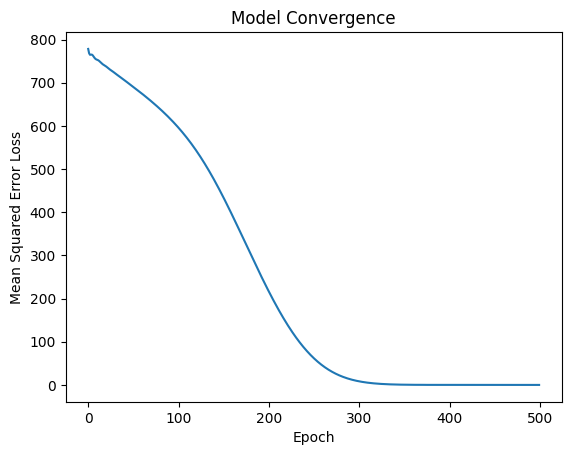

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Create a vector of Celsius temperatures
celsius_temps = np.array([-40, -20, 0, 10, 15, 25, 30, 40, 50, 60], dtype=float)

# Convert Celsius to Fahrenheit using the linear equation (F = C * 1.8 + 32)
fahrenheit_temps = celsius_temps * 1.8 + 32

# Build the model with three neurons in the dense layer
model = models.Sequential()

# Add a dense layer with three neurons and input_dim=1 (as we have one feature - Celsius temperature)
model.add(layers.Dense(units=3, input_dim=1, activation='linear'))

# Output layer with one neuron
model.add(layers.Dense(units=1, activation='linear'))

# Compile the model with mean squared error and a learning rate of 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error')

# Define a hook to print the output during training
class PrintOutput(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:
            print("\nEpoch {}: Predictions - {}".format(epoch, self.model.predict(celsius_temps)))

# Train the model
history = model.fit(celsius_temps, fahrenheit_temps, epochs=500, callbacks=[PrintOutput()])

# Evaluate the model
loss = model.evaluate(celsius_temps, fahrenheit_temps)
print("\nFinal loss: {:.2f}".format(loss))

# Make a prediction for the number 100
prediction_100 = model.predict([100])
print("\nPrediction for 100 Celsius: {:.2f} Fahrenheit".format(prediction_100[0, 0]))

# Print the weights of the network
print("\nWeights:")
for layer in model.layers:
    weights, biases = layer.get_weights()
    print("Weights: {}".format(weights))
    print("Biases: {}".format(biases))

# Plot the convergence process
plt.plot(history.history['loss'])
plt.title('Model Convergence')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.show()
